# TASK 1.1: CLEANING DATA SET AND TOKENIZATION
_ removing any unwanted characters and splitting text files into words _


In [1]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer 
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import operator
from collections import Counter
import collections
import pandas as pd
import nltk
import pathlib
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
import csv

## Functions

### a) Tokenization

In [2]:
# tokenize text file into sentences
from nltk import sent_tokenize
# nltk.download('punkt')

def token_sentences(text):
    sentences = sent_tokenize(text)   
    return sentences


# tokenize text file into words
def tokenization(text):

    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]
    
    return words



### a) Vocabulary
_ step 1: Tokenize the words into characters in the corpus and append </w> at the end of every word_

_Looking through vocabulary lists can help you find problems
(especially tokens that only occur once or twice)._

In [3]:
#converting a dataframe into a single list 
#text is split into words defined by their space inbetween
#words are inserted into list 

def words_list(text):
    #words are inserted into list 
    corpus=[]
    for row in text:
        tokens = row[0].split(" ")
        for token in tokens:
            corpus.append(token)
    
    
    def vocabulary_list(corpus):
        #initlialize the vocabulary
        vocab = list(set(" ".join(corpus)))
        vocab.remove(' ')
        return vocab
      
    
    def split_words_char(corpus):
        #split the word into characters
        corpus = [" ".join(token) for token in corpus]

        #appending </w>
        corpus=[token+' </w>' for token in corpus]
        return corpus
        
    x,y = split_words_char(corpus), vocabulary_list(corpus)


    return x,y


# Creating the Bag of Words model
def bag_of_words(text):
    word2count = {}
    for data in text:
        words = nltk.word_tokenize(data)
        for word in words:  
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    return word2count   

# Frequency of words in BAG
def freq_words(word2count):
    import heapq
    freq_words = heapq.nlargest(100, word2count, key=word2count.get)
    return freq_words


### b) Cleaning

In [4]:
# removing punctuations
# convert all words into lower cases
# remove stop words

def preprocess_text(words):
    #delete punctuations
    punctuation_table = str.maketrans('', '', string.punctuation)

    #convert all words into lower cases
    words = [word.translate(punctuation_table).lower() for word in words]
    
    #remove stopwords
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]

    return words


# cleaning sentences within data frame
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    return df


# remove only punctuations
def del_punctuations(words):

    punctuation_table = str.maketrans('', '', string.punctuation)

    words = [word.translate(punctuation_table).lower() for word in words]
    return words

# nltk.download('stopwords')
# remove stop words
def stop_words(words):
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return words

#nltk.download('wordnet')
#lemmatization of words
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text


### c) Basic statistics

In [5]:
# number of tokens, sentences, average tokens, total unique tokens, total number of tokens after cleaning

def basic_statistics(text):
    sents = nltk.sent_tokenize(text)
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]
    average_tokens = round(len(words)/len(sents))
    unique_tokens = set(words)
    token_ratio = round(len(unique_tokens)/len(tokens),3)
    stop_words = set(stopwords.words('english'))
    final_tokens = []
    for each in words:
        if each not in stop_words:
            final_tokens.append(each) 
    
    return len(tokens), len(sents), average_tokens, len(unique_tokens), token_ratio, len(final_tokens)


#returns frequency of each word
def word_frequency(words):
    frequency_words = collections.Counter(words)
    
    #convert counter object to dictionary
    frequency_words_dict = dict(frequency_words)
    res = dict(sorted(frequency_words_dict.items(), key=lambda item: item[1]))
    return res

#returns top 20 most common words
def top_20_most_common_words(freq_words):
    res = dict(Counter(freq_words).most_common(20))
    return res

## A) Tokenization of text files: Offensive

### Read in txt files: offensive/val_text.txt

In [6]:
file_path_val = pathlib.Path('datasets/offensive/val_text.txt')

with open(file_path_val, 'r') as f:
    text_val = f.read()       
    f.close()
    
words_val_txt = text_val[1:].split()
print(words_val_txt[:100])


['user', '@user', 'WiiU', 'is', 'not', 'even', 'a', 'real', 'console.', '@user', '@user', '@user', 'If', 'he', 'is', 'from', 'AZ', 'I', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids.', '@user', 'I', 'thought', 'Canada', 'had', 'strict', 'gun', 'control.', 'Help', 'me', 'understand', 'what', 'is', 'happening.', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Following', 'all', '#Maga', 'patriots', 'please', 'follow', 'back', '👍', '#LionsDen', '🦁', '#MAGA2KAG', '🇺🇸', '1', 'Minute', 'of', 'Truth:', 'Gun', 'Control', 'via', '@user', '@user', '@user', '@user', 'We', 'could', 'help', 'if', 'you', 'are', 'London', 'based', '😊', '@user', '@user', 'There', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the']


In [7]:
file_path_train = pathlib.Path('datasets/offensive/train_text.txt')


with open(file_path_train, 'r') as f:
    text_train = f.read()       
    f.close()
    
words_train_txt = text_train[1:].split()

print(words_train_txt[:100])


['user', 'Bono...', 'who', 'cares.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen.', '@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama’s', 'picks.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president.', '@user', 'Get', 'him', 'some', 'line', 'help.', 'He', 'is', 'gonna', 'be', 'just', 'fine.', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads.', 'He', 'brought', 'what', 'has', 'been', 'missing.', 'The', 'deep', 'ball', 'presence.', 'Now', 'he', 'just', 'needs', 'a', 'little', 'more', 'time', '@user', '@user', 'She', 'is', 'great.', 'Hi', 'Fiona!', '@user']


In [8]:
file_path_test = pathlib.Path('datasets/offensive/test_text.txt')


with open(file_path_test, 'r') as f:
    text_test = f.read()       
    f.close()
    
words_test_txt = text_test[1:].split()

print(words_test_txt[:100])


['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', '#snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '!!', 'From', 'dems', 'and', 'Iran', '!', 'Why', 'she', 'spoke', 'after', '#JohnKerryIranMeeting', '?', '@user', '@user', '@user', 'I', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'Trump', 'and', 'blacks', 'for', 'Trump', 'were', 'paid', 'supporters', '😂', 'then', 'I', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'No', 'they', 'are', 'anti-fascist', 'then', 'I', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me?!', '...if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death,', 'then', 'listen', 'to', 'the', 'ACLU,', 'Black']


In [9]:
# total number of tokenization of words for each variable
token_val = tokenization(text_val)
token_train = tokenization(text_train)
token_test = tokenization(text_test)

print(f'Number of words in tokenization for val_text: {len(token_val)}')
print(f'Number of words in tokenization for val_train: {len(token_train)}')
print(f'Number of words in tokenization for val_test: {len(token_test)}')

Number of words in tokenization for val_text: 30416
Number of words in tokenization for val_train: 258224
Number of words in tokenization for val_test: 19619


### Tokenize text file into sentences

In [10]:
sentences_val_txt = token_sentences(text_val)  
sentences_train_txt = token_sentences(text_train)
sentences_test_txt = token_sentences(text_test)   

print(sentences_val_txt[:5])
print(sentences_train_txt[:5])
print(sentences_test_txt[:5])

['@user @user WiiU is not even a real console.', '@user @user @user If he is from AZ I would put my money on sex with underage kids.', '@user I thought Canada had strict gun control.', 'Help me understand what is happening.', "@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Following all #Maga patriots please follow back 👍  #LionsDen 🦁  #MAGA2KAG 🇺🇸 \n1 Minute of Truth: Gun Control via @user \n@user @user @user We could help if you are London based 😊 \n@user @user There r 65 million that can sign to the affect that they didn't vote for an asshole."]
['@user Bono... who cares.', 'Soon people will understand that they gain nothing from following a phony celebrity.', 'Become a Leader of your people instead or help and support your fellow countrymen.', '@user Eight years the republicans denied obama’s picks.', 'Breitbarters outrage is as phony as their fake president.']
['#ibelieveblaseyford is liar she is fat ugly libreal #snowflake she sold

In [11]:
print(f'Number of sentences for val_text: {len(sentences_val_txt)}')
print(f'Number of sentences for val_train: {len(sentences_train_txt)}')
print(f'Number of sentences for val_test: {len(sentences_test_txt)}')

Number of sentences for val_text: 2124
Number of sentences for val_train: 18122
Number of sentences for val_test: 1214


### Vocabulary list for offensive text files


In [12]:

corpus_val, vocab_val = words_list(text_val)
corpus_train, vocab_train = words_list(text_train)
corpus_test, vocab_test = words_list(text_test)

print('Vocabulary for text_val.txt:\n', vocab_val[:20],'\n')
print('Vocabulary for text_train.txt:\n', vocab_train[:20],'\n')
print('Vocabulary for text_test.txt:\n', vocab_test[:20],'\n')

Vocabulary for text_val.txt:
 ['❤', '✔', 't', '🦁', '✍', '💚', ';', 'M', ',', 'a', 'W', '💔', 'O', 'e', '💞', 'P', '？', '\xa0', 'w', 'z'] 

Vocabulary for text_train.txt:
 ['𝙾', '♑', '💃', '🦁', ';', '😿', '💋', '𝚎', '😐', '―', 'z', 'L', 'ï', '\n', '🐶', '👋', 'f', 'i', '♡', '💯'] 

Vocabulary for text_test.txt:
 ['❤', '✔', '🦅', 't', '💃', '💚', ';', 'M', ',', 'a', 'W', 'O', '🧡', 'e', '💞', 'P', '\xa0', 'w', 'z', 'L'] 



***

## B) Cleaning: Pre-processing text file

_
1. remove puncuations 
2. convert all words into lower case
2. remove stop words
_

### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [13]:

cleaned_val_words = del_punctuations(words_val_txt)
cleaned_train_words = del_punctuations(words_train_txt)
cleaned_test_words = del_punctuations(words_test_txt)

# preview
print('val_text.txt:\n',cleaned_val_words[:10],'\n')
print('\nval_train.txt:\n',cleaned_train_words[:10], '\n')
print('\nval_test.txt:\n',cleaned_test_words[:10],'\n')



val_text.txt:
 ['user', 'user', 'wiiu', 'is', 'not', 'even', 'a', 'real', 'console', 'user'] 


val_train.txt:
 ['user', 'bono', 'who', 'cares', 'soon', 'people', 'will', 'understand', 'that', 'they'] 


val_test.txt:
 ['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', 'snowflake', 'she'] 



### Remove stop words and total number of each variable after cleaning

In [14]:
cleaned_val_words = stop_words(token_val)
cleaned_train_words = stop_words(token_train)
cleaned_test_words = stop_words(token_test)

# display
print(f'Number of words after removing Stop Words: {len(cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(cleaned_test_words)}')


Number of words after removing Stop Words: 17155
Number of words after removing Stop Words: 147302
Number of words after removing Stop Words: 11080


***

## C) Basic Statistics

### Function for calculating:

1. Number of tokens
2. Number of sentences
3. Average tokens pr sentence
4. Number of unique tokens
5. Final number of tokens after removing stop words

### text_val.txt

In [15]:

#get number of: 
# total tokens
# total sentences
# average tokens
# unique tokens 
# final number of tokens after removing stop words

tokens_count, sents_count, avg_tokens, uni_tokens, token_rat, final_tokens = basic_statistics(text_val)

In [16]:
print(f'The number of tokens is: {tokens_count}')
print(f'The number of sentences is: {sents_count}')
print(f'The average number of tokens per sentence is: {avg_tokens}')
print(f'The number of unique tokens are: {uni_tokens}')
print(f'The tokens ratio is: {token_rat}')
print(f'The number of total tokens after removing stopwords are: {final_tokens}')

The number of tokens is: 39409
The number of sentences is: 2124
The average number of tokens per sentence is: 14
The number of unique tokens are: 4961
The tokens ratio is: 0.126
The number of total tokens after removing stopwords are: 17155


### train_text.txt

In [18]:
#get number of: 
# total tokens
# total sentences
# average tokens
# unique tokens 
# final number of tokens after removing stop words

tokens_train, sents_train, avg_train, uni_train,token_train_rat, final_train = basic_statistics(text_train)

In [20]:
print(f'The number of tokens is: {tokens_train}')
print(f'The number of sentences is: {sents_train}')
print(f'The average number of tokens per sentence is: {avg_train}')
print(f'The number of unique tokens are: {uni_train}')
print(f'The tokens ratio is: {token_train_rat}')
print(f'The number of total tokens after removing stopwords are: { final_train}')

The number of tokens is: 336416
The number of sentences is: 18122
The average number of tokens per sentence is: 14
The number of unique tokens are: 17111
The tokens ratio is: 0.051
The number of total tokens after removing stopwords are: 147302


### text_test.txt

In [22]:
#get number of: 
# total tokens
# total sentences
# average tokens
# unique tokens 
# final number of tokens after removing stop words

tokens_test, sents_test, avg_test, uni_test, token_test_rat, final_test = basic_statistics(text_test)

In [23]:
print(f'The number of tokens is: {tokens_test}')
print(f'The number of sentences is: {sents_test}')
print(f'The average number of tokens per sentence is: {avg_test}')
print(f'The number of unique tokens are: {uni_test}')
print(f'The tokens ratio is: {token_test_rat}')
print(f'The number of total tokens after removing stopwords are: { final_test}')

The number of tokens is: 26036
The number of sentences is: 1214
The average number of tokens per sentence is: 16
The number of unique tokens are: 4839
The tokens ratio is: 0.186
The number of total tokens after removing stopwords are: 11080


### Frequency 


In [24]:

freq_words_val = word_frequency(cleaned_val_words)
freq_words_train = word_frequency(cleaned_train_words)
freq_words_test = word_frequency(cleaned_test_words)

# displays the final 40 elements from the back end of the list
print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('love', 31), ('great', 31), ('much', 32), ('democrats', 32), ('country', 32), ('could', 33), ('vote', 33), ('shit', 33), ('never', 35), ('believe', 35), ('way', 35), ('need', 36), ('say', 37), ('still', 38), ('time', 40), ('make', 40), ('go', 41), ('good', 42), ('even', 43), ('see', 44), ('right', 45), ('going', 47), ('us', 52), ('want', 55), ('would', 61), ('amp', 62), ('think', 68), ('trump', 69), ('one', 71), ('get', 73), ('know', 77), ('people', 89), ('maga', 98), ('conservatives', 107), ('like', 109), ('antifa', 118), ('control', 125), ('gun', 133), ('liberals', 137)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('better', 237), ('vote', 237), ('well', 240), ('much', 249), ('left', 252), ('still', 262), ('make', 276), ('way', 2

In [25]:
# top 20 of common words
top_20_val = top_20_most_common_words(freq_words_val)
top_20_train = top_20_most_common_words(freq_words_train)
top_20_test = top_20_most_common_words(freq_words_test)

print('Top 20 in val_text.txt:\n',top_20_val, '\n')
print('Top 20 in val_train.txt:\n',top_20_train,'\n')
print('Top 20 in val_test.txt:\n',top_20_test,'\n')

Top 20 in val_text.txt:
 {'user': 3455, 'liberals': 137, 'gun': 133, 'control': 125, 'antifa': 118, 'like': 109, 'conservatives': 107, 'maga': 98, 'people': 89, 'know': 77, 'get': 73, 'one': 71, 'trump': 69, 'think': 68, 'amp': 62, 'would': 61, 'want': 55, 'us': 52, 'going': 47, 'right': 45} 

Top 20 in val_train.txt:
 {'user': 29961, 'liberals': 1260, 'gun': 1230, 'control': 1095, 'antifa': 1047, 'like': 995, 'maga': 907, 'conservatives': 839, 'people': 830, 'amp': 615, 'get': 586, 'one': 568, 'trump': 565, 'know': 557, 'would': 507, 'think': 483, 'good': 416, 'right': 409, 'time': 349, 'us': 345} 

Top 20 in val_test.txt:
 {'user': 608, 'liberals': 81, 'conservatives': 80, 'antifa': 74, 'like': 65, 'gun': 64, 'control': 64, 'maga': 57, 'get': 51, 'one': 48, 'people': 47, 'trump': 44, 'us': 42, 'love': 38, 'want': 37, 'via': 33, 'know': 31, 'good': 31, 'going': 30, 'new': 30} 



***

_source:https://medium.com/vickdata/detecting-hate-speech-in-tweets-natural-language-processing-in-python-for-beginners-4e591952223 _

In [26]:
import pandas as pd

train = pd.read_csv('datasets/offensive/train_text.txt', header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Training Set:"% train.columns, train.shape, len(train))


test = pd.read_csv('datasets/offensive/test_text.txt',header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (11916, 1) 11916
Test Set: (860, 1) 860


In [27]:

index_train = [x for x in range(1, len(train.values)+1)]
index_test = [x for x in range(1, len(test.values)+1)]

train.insert(loc=0, column='id', value =index_train )
test.insert(loc=0, column='id', value =index_test )


In [28]:
train_labels = pd.read_csv('datasets/offensive/train_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
train_labels.insert(loc=0, column='id', value=index_train)

test_labels = pd.read_csv('datasets/offensive/test_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
test_labels.insert(loc=0, column='id', value =index_test )

In [29]:
test_df = test.merge(test_labels, on='id', how='left')
train_df = train.merge(train_labels, on='id', how='left')



In [30]:
train_df

id                                              tweet  label
0          1  @user Bono... who cares. Soon people will unde...      0
1          2  @user Eight years the republicans denied obama...      1
2          3  @user Get him some line help. He is gonna be j...      0
3          4               @user @user She is great. Hi Fiona!       0
4          5  @user She has become a parody unto herself? Sh...      1
...      ...                                                ...    ...
11911  11912   @user I wonder if they are sex traffic victims?       1
11912  11913  @user Do we dare say he is... better than Nyjer?       0
11913  11914                    @user No idea who he is. Sorry       0
11914  11915  #Professor Who Shot Self Over Trump Says Gun C...      0
11915  11916  @user @user @user Here your proof!  Our Africa...      1

[11916 rows x 3 columns]

In [31]:
test_df

id                                              tweet  label
0      1  #ibelieveblaseyford is liar she is fat ugly li...      1
1      2  @user @user @user I got in a pretty deep debat...      0
2      3  ...if you want more shootings and more death, ...      0
3      4  Angels now have 6 runs. Five of them have come...      0
4      5  #Travel #Movies and Unix #Fortune combined  Vi...      0
..   ...                                                ...    ...
855  856  #CNN irrationally argues 4 legalising #abortio...      0
856  857  @user @user @user @user @user @user @user @use...      0
857  858  #Conservatives don’t care what you post..it’s ...      1
858  859  #antifa #Resist.. Trump is trying to bring wor...      0
859  860  #Maine you need to face facts @user doesn’t re...      0

[860 rows x 3 columns]

In [32]:
test_clean = clean_text(test_df, 'tweet')
train_clean = clean_text(train_df, 'tweet')

https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7


In [33]:
test_clean.head()

id                                              tweet  label
0   1   ibelieveblaseyford is liar she is fat ugly li...      1
1   2        i got in a pretty deep debate with my fr...      0
2   3     if you want more shootings and more death  ...      0
3   4  angels now have 6 runs  five of them have come...      0
4   5   travel  movies and unix  fortune combined  vi...      0

In [34]:
stop = stopwords.words('english')

train_clean['tweet'] = train_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_clean.head()

id                                              tweet  label
0   1  bono cares soon people understand gain nothing...      0
1   2  eight years republicans denied obama picks bre...      1
2   3  get line help gonna fine game went could see p...      0
3   4                                     great hi fiona      0
4   5  become parody unto certainly taken heat well i...      1

In [35]:
stop = stopwords.words('english')
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test_clean.head()

id                                              tweet  label
0   1  ibelieveblaseyford liar fat ugly libreal snowf...      1
1   2  got pretty deep debate friend told latinos tru...      0
2   3  want shootings death listen aclu black lives m...      0
3   4  angels 6 runs five come courtesy mike trout ho...      0
4   5  travel movies unix fortune combined visit sali...      0

In [36]:
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: word_tokenize(x))
test_clean.head()

id                                              tweet  label
0   1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0

In [38]:
test_clean_offensive = test_clean.loc[test_clean['label'] == 1]

#est_clean_offensive['tweet'].to_csv('test_cleaned_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 
test_clean_offensive.head()

id                                              tweet  label
0    1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
8    9  [grown, ass, woman, probably, 10, years, older...      1
10  11  [kavanaugh, disciple, anthony, kennedy, ed, li...      1
15  16  [apparently, committed, going, new, level, sin...      1
18  19  [50, cent, calls, joe, budden, bullshit, insta...      1

In [40]:
test_clean_nonoffensive = test_clean.loc[test_clean['label'] == 0]

#test_clean_nonoffensive['tweet'].to_csv('test_cleaned_non_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 
test_clean_nonoffensive.head()

id                                              tweet  label
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0
5   6  [naturephotography, nature, birds, wild, wisco...      0

In [41]:
test_csv = test_clean_nonoffensive.explode('tweet')

In [42]:
test = test_clean_offensive['tweet'].values.tolist()


## Frequency of words on non-cleaned texts

In [43]:

bag_test = bag_of_words(words_test_txt)
bag_train = bag_of_words(words_train_txt)



In [44]:

freq_test = freq_words(bag_test)
freq_train = freq_words(bag_train)


In [65]:
import collections
import nltk.tokenize
import numpy
import pandas
import pickle
import seaborn
import matplotlib.pyplot as plt


tok = nltk.tokenize.TreebankWordTokenizer()

def make_corpus(filename):
    corpus = []
    with open(filename, 'r') as f:
        for line in f:
            corpus.extend(t for line in f for t in tok.tokenize(line))
    
    return corpus

corpus_train = make_corpus('datasets/offensive/train_text.txt')
corpus_value = make_corpus('datasets/offensive/val_text.txt')

In [97]:

def dataframe_corpus(corpus):
    voc = collections.Counter(corpus)
    frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    return frq

def freq_cum(frq):
    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    return frq


frq_train = dataframe_corpus(corpus_train)
frq_train.head()
#frq_train = freq_cum(frq_train)

token  frequency
0     @      29977
1  user      29811
2   the       7249
3    is       5643
4    to       5454

In [70]:
frq_value = dataframe_corpus(corpus_value)
frq_value = freq_cum(frq_value)

In [71]:
frq_train.head()

token  frequency  idx  norm_freq  cumul_frq
0     @      29977    1   0.084861   0.084861
1  user      29811    2   0.084391   0.169253
2   the       7249    3   0.020521   0.189774
3    is       5643    4   0.015975   0.205748
4    to       5454    5   0.015440   0.221188

In [72]:
frq_value.head()

token  frequency  idx  norm_freq  cumul_frq
0     @       3457    1   0.009786   0.009786
1  user       3429    2   0.009707   0.019493
2   the        822    3   0.002327   0.021820
3    to        706    4   0.001999   0.023819
4    is        665    5   0.001883   0.025702

In [48]:
seaborn.set(style='whitegrid')



In [73]:

# Plot: Cumulative frequency by index
def freq_cum_plot(frq):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq)
    return plt.show()




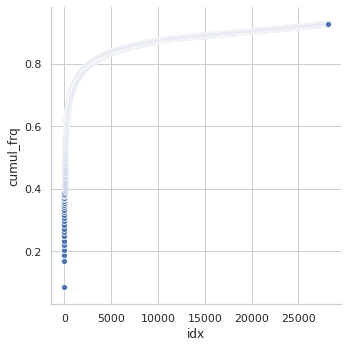

In [74]:
freq_cum_plot(frq_train)

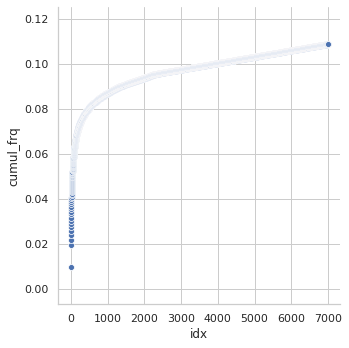

In [75]:
freq_cum_plot(frq_value)

In [87]:
# Plot: Cumulative frequency by index, top x tokens
def freq_cum_plot_top_x_tokens(frq, top_x):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq[:int(top_x)], kind='line')
    return plt.show()

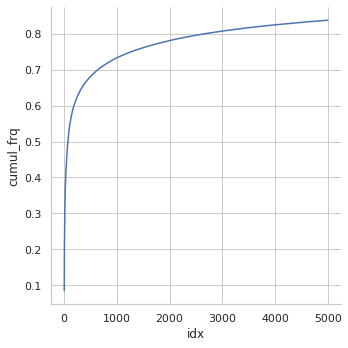

In [88]:
freq_cum_plot_top_x_tokens(frq_train, 5000)


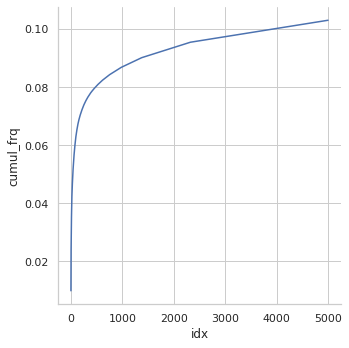

In [91]:
freq_cum_plot_top_x_tokens(frq_value, 5000)


In [93]:
# Plot: Log-log plot for Zipf's law

def zipfs_law(frq):
    frq['log_frq'] = numpy.log(frq.frequency)
    frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=True))
    seaborn.relplot(x='log_rank', y='log_frq', data=frq)
    return plt.show()
    

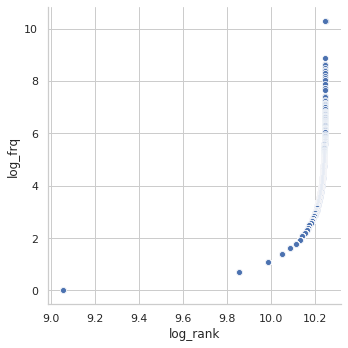

In [94]:
zipfs_law(frq_train)

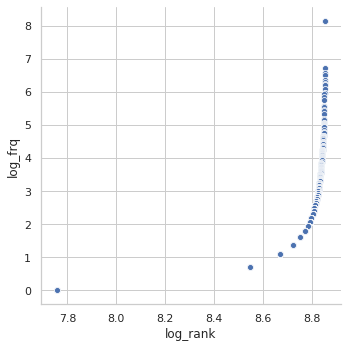

In [95]:
zipfs_law(frq_value)

In [61]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()

tweet_tokenizer = tt.tokenize(text_test)
word_tweet_tok = word_tokenize(text_test)

print(tweet_tokenizer[:5])
print(word_tweet_tok[:5])



['#ibelieveblaseyford', 'is', 'liar', 'she', 'is']
['#', 'ibelieveblaseyford', 'is', 'liar', 'she']
